In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from swdb_2018_neuropixels.ephys_nwb_adapter import NWB_adapter  
drive_path = '/data/dynamic-brain-workshop/visual_coding_neuropixels'
# import allensdk.brain_observatory.stimulus_info as si
# from allensdk.core.brain_observatory_cache import BrainObservatoryCache
# boc =  BrainObservatoryCache()

In [2]:
manifest_file = os.path.join(drive_path,'ephys_manifest.csv')
expt_info_df = pd.read_csv(manifest_file)
multi_probe_expt_info = expt_info_df[expt_info_df.experiment_type == 'multi_probe']
multi_probe_filename = 'ephys_multi_58.nwb'
nwb_file = os.path.join(drive_path,multi_probe_filename)
data_set = NWB_adapter(nwb_file)

In [4]:
stim_name = 'static_gratings' #'drifting_gratings'
stim_table = data_set.stim_tables[stim_name]

stim_table


,start,end,spatial_frequency,orientation,phase
0,5398.30014,5398.54916,0.16,0.0,0.50
1,5398.54916,5398.79964,0.04,0.0,0.00
2,5398.79964,5399.04981,0.02,90.0,0.50
3,5399.04981,5399.30128,0.04,150.0,0.75
4,5399.30128,5399.55070,0.02,30.0,0.00
5,5399.55070,5399.80032,0.02,120.0,0.50
6,5399.80032,5400.05050,0.08,150.0,0.75
7,5400.05050,5400.30226,0.02,90.0,0.50
8,5400.30226,5400.55150,0.16,0.0,0.75
9,5400.55150,5400.80162,0.32,120.0,0.50


In [67]:
def get_data_at_time(time, stim_table):
    starts = stim_table.start.values
    idx = np.searchsorted(starts, time)-1
    if time<stim_table.end.values[idx]:
        return(stim_table.iloc[idx].values[2:5])
    else:
        return np.array([np.nan]*3)

def get_stim_time_array(stim_table, tns_start, tns_end, bin_len):
    T = int(np.floor((tns_end - tns_start)/bin_len))
    time_array = np.linspace(tns_start,tns_end,T)
    stim_array = []
    for time_point in time_array:
        stim_data = get_data_at_time(time_point, stim_table)
        stim_array.append(np.nan_to_num(stim_data+1)-1)
    stim_array = np.array(stim_array).T
    stim_array[0,:]*=100
    stim_array[2,:]*=100
    stim_array = np.round(stim_array).astype(int)
    return(stim_array, time_array)

  
# bin_len = 0.01
bin_len = 0.004
num_stim_rows = -1 #17999
tns_start = stim_table.iloc[0].values[0]
tns_end = stim_table.iloc[num_stim_rows].values[1]
[stim_array, time_array] = get_stim_time_array(stim_table,tns_start,tns_end,bin_len)
print (tns_end-tns_start)/bin_len, time_array.shape, stim_array.shape


 938296.6275000001 (938296,) (3, 938296)


In [68]:
def bin_spikes(data_set,bin_len,t_start,t_final,probes=None,regions=None):
    if probes is None:
        probes = data_set.probe_list
    if regions is None:
        regions = data_set.unit_df.structure.unique()
    
    #gather cells from desired regions and probes into cell_table
    use_cells = False
    for probe in probes:
        for region in regions:
            use_cells |= (data_set.unit_df.probe==probe) & (data_set.unit_df.structure==region)
    cell_table = data_set.unit_df[use_cells]
    
    N = len(cell_table)     #number of cells
    T = int(np.floor((t_final-t_start)/bin_len)) #number of time bins
    binned_spikes = np.zeros((N,T)) # binned_spikes[i,j] is the number of spikes from neuron i in time bin j

    #for each cell in the table, add each spike to the appropriate bin
    i = 0
    for z,cell in cell_table.iterrows(): 
        for spike_time in data_set.spike_times[cell['probe']][cell['unit_id']]:
            t = int(np.floor((spike_time-t_start)/bin_len))
            if (t >=0) & (t<T):
                binned_spikes[i,t] += 1
        i+=1    
    return (binned_spikes, cell_table)

(binned_spikes, cell_table) = bin_spikes(data_set,bin_len,tns_start,tns_end,regions=['VISp'])

[ 32 150  75]
[ 2 30  0]
(3, 750637) (71, 750637)


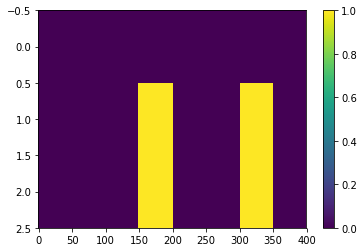

In [61]:
print np.max(stim_array,keepdims=False,axis=1)
plt.imshow((stim_array/np.max(stim_array,keepdims=True,axis=1))[:,:400])
plt.axis('tight')
plt.colorbar()
print stim_array[:,225]
print stim_array.shape, binned_spikes.shape

In [62]:
# from CCmax import *
# import warnings
# warnings.filterwarnings("ignore",category=UserWarning)

# oris = stim_table['orientation'].unique()
# oris = oris[np.logical_not(np.isnan(oris))]
# freqs = stim_table['temporal_frequency'].unique()
# freqs = freqs[np.logical_not(np.isnan(freqs))]
# trial_len = 0.25 #2.0

# CCmaxs = np.empty((binned_spikes.shape[0],))
# for i in range(binned_spikes.shape[0]):
#     maxCCmax = 0
#     for ori in oris:
#         for freq in freqs:
#             trials_table = stim_table[stim_table['orientation']==ori][stim_table['temporal_frequency']==freq]
#             trials = len(trials_table)
#             bins = int(trial_len/bin_len)
#             R = np.empty((trials,bins))
#             for trial in range(trials):
#                 t_start = trials_table.start.values[trial]
#                 t_start_ind = np.argmin(np.abs(time_array-t_start))+1
#                 R[trial,:] = binned_spikes[i,t_start_ind:t_start_ind+bins]
#             maxCCmax = max(maxCCmax,CCmax(R)[0])
#     CCmaxs[i] = maxCCmax
# plt.plot(CCmaxs) 

In [84]:
from CCmax import *
import warnings
warnings.filterwarnings("ignore",category=UserWarning)

var_inds = [2,3,4]
var_names = stim_table.keys()[var_inds]
conds = np.unique(stim_table.values[:,var_inds],axis=0)
conds = conds[np.logical_not(np.isnan(conds[:,0])),:]

trial_len = 0.25 #2.0
bins = int(trial_len/bin_len)

CCmaxs = np.empty((binned_spikes.shape[0],))
for i in range(binned_spikes.shape[0]):
    maxCCmax = 0
    for cond in conds:
        trials_table = stim_table
        for v in range(len(var_names)):
            trials_table = trials_table[trials_table[var_names[v]]==cond[v]]
        trials = len(trials_table)
        
        R = np.empty((trials,bins))
        for trial in range(trials):
            t_start = trials_table.start.values[trial]
            t_start_ind = np.argmin(np.abs(time_array-t_start))+1
            R[trial,:] = binned_spikes[i,t_start_ind:t_start_ind+bins]
        maxCCmax = max(maxCCmax,CCmax(R)[0])
    CCmaxs[i] = maxCCmax
plt.plot(CCmaxs) 

CCmax.py:147: RuntimeWarning: invalid value encountered in double_scalars
  CC_max = np.sqrt(SP/Vy)


(array([ 2.,  1.,  6., 10., 12., 13., 10.,  7.,  5.,  5.]),
 array([0.52788951, 0.57216762, 0.61644573, 0.66072384, 0.70500195,
        0.74928006, 0.79355817, 0.83783628, 0.88211439, 0.9263925 ,
        0.97067061]),
 <a list of 10 Patch objects>)

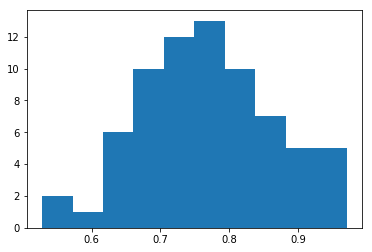

In [87]:
k = 30
cell_idxs = np.argsort(CCmaxs)
plt.hist(CCmaxs)

In [88]:
np.savez(stim_name+'_data_'+str(int(1000*bin_len))+'ms',binned_spikes=binned_spikes, stim_array=stim_array, CCmaxs=CCmaxs, bin_len=bin_len)
